In [30]:
import pandas as pd 
df = pd.read_csv("analysis.csv")
df

,Robot,LLM,Pose,Avg1,Avg2,Sum1,Sum2
0,nao,chat,T_pose,0.239288,0.239288,0.478576,0.478576
1,nao,claude,T_pose,0.005062,0.019984,0.010124,0.079937
2,nao,gemini,T_pose,0.239288,0.239288,0.478576,0.478576
3,nao,deepseek,T_pose,0.239288,1.126963,0.478576,6.761776
4,nao,chat,salute,0.488383,0.581691,1.953530,4.653530
...,...,...,...,...,...,...,...
59,khr3hv,deepseek,superhero,1.523333,1.535000,9.140000,12.280000
60,khr3hv,chat,sit,3.370000,2.413333,13.480000,14.480000
61,khr3hv,claude,sit,1.015000,0.860000,4.060000,8.600000
62,khr3hv,gemini,sit,3.370800,2.770800,13.483200,16.624800


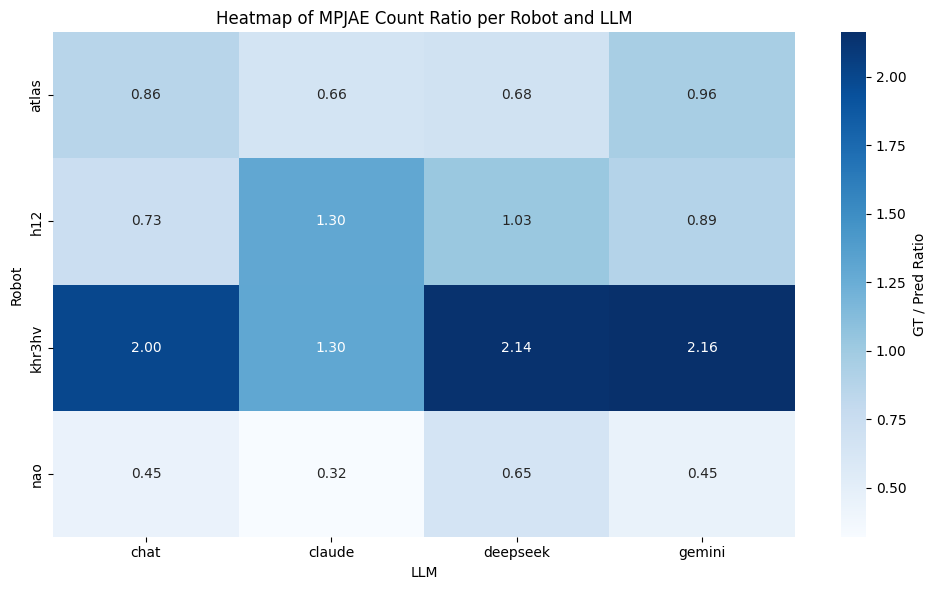

In [36]:

heatmap_data = df.groupby(["Robot","LLM"])["Avg1"].mean()
heatmap_data = heatmap_data.unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", cbar_kws={"label": "GT / Pred Ratio"})
plt.title("Heatmap of MPJAE Count Ratio per Robot and LLM")
plt.ylabel("Robot")
plt.xlabel("LLM")
plt.tight_layout()
plt.show()

In [32]:
df.groupby(["LLM"])["Avg2"].mean() #Best LLM

LLM
chat        0.938408
claude      0.805317
deepseek    1.078145
gemini      1.079885
Name: Avg2, dtype: float64

In [ ]:
df.groupby(["Robot","LLM"])["Sum1"].mean()

Robot   LLM     
atlas   chat        4.879160
        claude      3.689160
        deepseek    3.889160
        gemini      5.347910
h12     chat        3.462500
        claude      6.273700
        deepseek    5.011200
        gemini      3.947898
khr3hv  chat        8.015000
        claude      4.977500
        deepseek    8.547900
        gemini      8.626600
nao     chat        3.002371
        claude      2.431041
        deepseek    3.896015
        gemini      2.830853
Name: Error1, dtype: float64

In [ ]:
df.groupby(["Robot","LLM"])["Sum2"].mean()

Robot   LLM     
atlas   chat         5.704160
        claude       6.449560
        deepseek     5.214160
        gemini       5.347910
h12     chat         5.882500
        claude       8.193700
        deepseek     7.759100
        gemini       7.638090
khr3hv  chat         9.325400
        claude       6.587500
        deepseek    14.078700
        gemini      10.982800
nao     chat         5.052371
        claude       3.273494
        deepseek     6.651815
        gemini       3.055853
Name: Error2, dtype: float64

In [ ]:
import pandas as pd 
df = pd.read_csv("analysis_count.csv")
df

,Robot,LLM,Pose,GT_count,Pred_count
0,nao,chat,T_pose,2,2
1,nao,claude,T_pose,2,4
2,nao,gemini,T_pose,2,2
3,nao,deepseek,T_pose,2,6
4,nao,chat,salute,4,8
...,...,...,...,...,...
59,khr3hv,deepseek,superhero,6,4
60,khr3hv,chat,sit,4,6
61,khr3hv,claude,sit,4,8
62,khr3hv,gemini,sit,4,6


In [26]:
ratio = df.groupby(["Robot","LLM"])["GT_count"].mean()/df.groupby(["Robot","LLM"])["Pred_count"].mean()

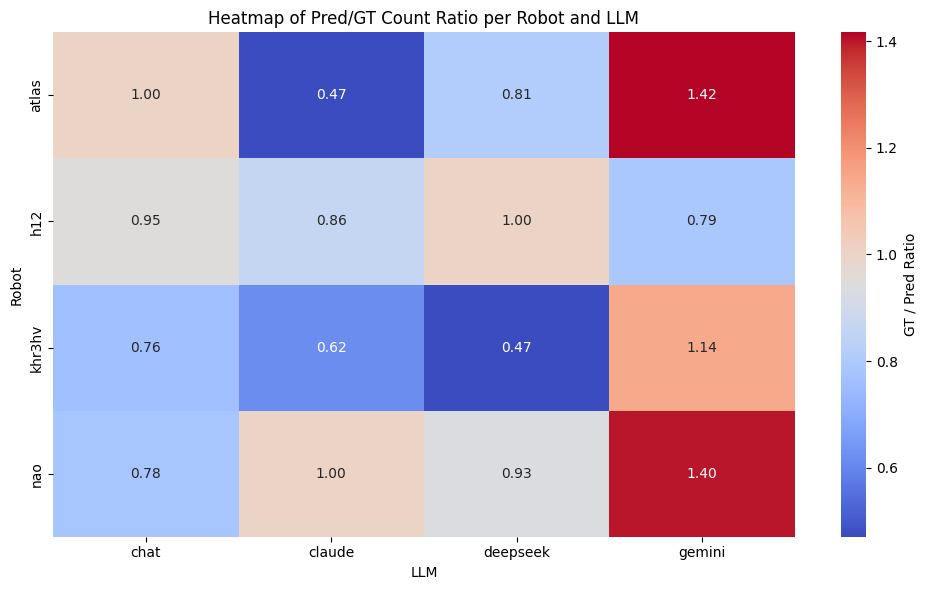

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = ratio.unstack()  # rows=Robot, columns=LLM

# Plot della heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "GT / Pred Ratio"})
plt.title("Heatmap of Pred/GT Count Ratio per Robot and LLM")
plt.ylabel("Robot")
plt.xlabel("LLM")
plt.tight_layout()
plt.show()